# Identificação de Alzaimer em imagens RX
* Mohammad Reza Tabrizi

# Geral pasta para guardar imagem Augmentation

!mkdir /content/Augmentation_ModerateDemented_Alz

# Data Augmentation
### De modo a aumentar os dados Alzaimer, ainda pouco disponíveis no caso de (ModerateDemented) e  (MildDemented) , procedeu-se à geração de novos dados. Esta ação ajudará no controlo do overfitting e na previsão do modelo.

### Por cada imagem ModerateDemented (label=1) no conjunto de treino, a suguinte função gerará 30 imagens adicionais e Por cada imagem MildDemented (label=2) no conjunto de treino, a suguinte função gerará 2 imagens adicionais, recorrendo a ligeiras translaões e outro característica  da imagem inicial como (enviezamento, zoom, simetria,brightness_range ). Para o problema em análise, as restantes transformações não foram consideradas adequadas.

In [ ]:
g=0
train_datagen = ImageDataGenerator(
      #rotation_range=25,#rotacao:0;180
      width_shift_range=0.1,#translaçao vertical
      height_shift_range=0.1,# translação horizontal
      shear_range=0.1,#enviezamento: quadrado->losango
      zoom_range=0.3,#zoom
      horizontal_flip=True,#simetria
      brightness_range=[0.2,1.0],
      fill_mode='nearest')
k=0
#max_len=len(y_all)-1

for j in range(1,len(y_train),1):
    if y_train[j]==1: #Alzaimer_ModerateDemented
        k=k+1
        img = X_train[j]
        # Convert it to a Numpy array
        x = image.img_to_array(img)

        # Reshape it to (1, shape)
        x = x.reshape((1,) + x.shape)

        # The .flow() command below generates batches of randomly transformed images.
        # It will loop indefinitely, so we need to `break` the loop at some point!
        i = 0
        plt.rcParams['figure.figsize'] = (10.0, 10.0)
        plt.subplots_adjust(wspace=0.5, hspace=0.2)
        for batch in train_datagen.flow(x, batch_size=1):
            imgplot = plt.imshow(image.array_to_img(batch[0]),cmap='gray', vmin=0, vmax=255)
            i += 1
            #triplicar imagens
            if i % 30 == 0:
                g=g+30
                print(g)
                break
            plt.axis('off')
            #plt.savefig("test.jpg", bbox_inches='tight')

            plt.savefig('Augmentation_ModerateDemented_Alz/ModerateDemented_Alz_'+str(j)+str(i)+".jpg")

            
        #plt.show() 
print(k)

# Geral pasta para guardar imagem Augmentation

In [ ]:
!mkdir /content/Augmentation_MildDemented_Alz

In [ ]:
g=0
train_datagen = ImageDataGenerator(
      #rotation_range=25,#rotacao:0;180
      width_shift_range=0.1,#translaçao vertical
      height_shift_range=0.1,# translação horizontal
      shear_range=0.1,#enviezamento: quadrado->losango
      zoom_range=0.3,#zoom
      horizontal_flip=True,#simetria
      brightness_range=[0.2,1.0],
      fill_mode='nearest')
k=0
#max_len=len(y_all)-1

for j in range(1,len(y_train),1):
    if y_train[j]==2: #Alzaimer_ModerateDemented
        k=k+1
        img = X_train[j]
        # Convert it to a Numpy array
        x = image.img_to_array(img)

        # Reshape it to (1, shape)
        x = x.reshape((1,) + x.shape)

        # The .flow() command below generates batches of randomly transformed images.
        # It will loop indefinitely, so we need to `break` the loop at some point!
        i = 0
        plt.rcParams['figure.figsize'] = (10.0, 10.0)
        plt.subplots_adjust(wspace=0.5, hspace=0.2)
        for batch in train_datagen.flow(x, batch_size=1):
            imgplot = plt.imshow(image.array_to_img(batch[0]),cmap='gray', vmin=0, vmax=255)
            i += 1
            #triplicar imagens
            if i % 2 == 0:
                g=g+2
                print(g)
                break
            plt.axis('off')
            #plt.savefig("test.jpg", bbox_inches='tight')

            plt.savefig('Augmentation_MildDemented_Alz/MildDemented_Alz_'+str(j)+str(i)+".jpg")

            
        #plt.show() 
print(k)

In [ ]:
train_dir = "Aug_image/"
#test_dir =  "Alz_DB/test/"
# cuando ya tenemos prosesamos imagenes es false
LOAD_FROM_IMAGES = True

## Função de seguida, as imagens  são converter em arrays:

In [ ]:
def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['Augmentation_ModerateDemented_Alz']:
                label = 1
            elif folderName in ['Augmentation_MildDemented_Alz']:
                label = 2
            else:
                label = 5
            
            for image_filename in tqdm(os.listdir(folder + folderName)):
                    img_file = cv2.imread(folder + folderName + '/' + image_filename)
                    if img_file is not None:
                        img_file = skimage.transform.resize(img_file, (200, 200, 3),mode='constant',
                                                            anti_aliasing=True)
                        img_file = rgb2gray(img_file)
                        img_arr = np.asarray(img_file)
                        X.append(img_arr)
                        y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

## De seguida, as imagens são  guardadas em arrays:

In [ ]:
if LOAD_FROM_IMAGES:
    #cargamos las imágenes a los arrays
    X_Arurgmantation, y_Arurgmantation = get_data(train_dir)
    #X_test_All, y_test_All= get_data(test_dir)
    
    #grabamos los arrays en archivos
    np.save('X_Arurgmantation.npy', X_Arurgmantation)
    np.save('y_Arurgmantation.npy', y_Arurgmantation)
    #np.save('xtest_All.npy', X_test_All)
    #np.save('ytest_All.npy', y_test_All)
    X_Arurgmantation = np.load('X_Arurgmantation.npy')
    y_Arurgmantation = np.load('y_Arurgmantation.npy')
   # X_test_All = np.load('xtest_All.npy')
   # y_test_All = np.load('ytest_All.npy')
else:
    #cargamos los arrays anteriormente grabados
    X_Arurgmantation = np.load('X_Arurgmantation.npy')
    y_Arurgmantation = np.load('y_Arurgmantation.npy')
    #X_test_All = np.load('xtest_All.npy')
    #y_test_All = np.load('ytest_All.npy')

100%|██████████| 1509/1509 [02:53<00:00,  8.68it/s]


In [ ]:
X_Arurgmantation = np.load('X_Arurgmantation.npy')
y_Arurgmantation = np.load('y_Arurgmantation.npy')

### Por fim são anexadas às imagens de Original_image e Arurgmantation para contabilizar

In [ ]:
y_all= np.concatenate((y_all_Original_image,y_Arurgmantation),axis=0)
X_all=np.concatenate((X_all_Original_image,X_Arurgmantation),axis=0)

In [ ]:
def count_labels(y_all):
  how_many_0 = len(np.where(y_all==0)[0])
  how_many_1 = len(np.where(y_all==1)[0])
  how_many_2 = len(np.where(y_all==2)[0])
  how_many_3 = len(np.where(y_all==3)[0])

  print('#NonDemented_all:',how_many_0)
  print('#ModerateDemented_all:',how_many_1)
  print('#MildDemented_all:',how_many_2)
  print('#VeryMildDemented_all:',how_many_3)

## O plot evidencia um conjunto de dados mais balanceado.

#NonDemented_all: 3200
#ModerateDemented_all: 1572
#MildDemented_all: 1612
#VeryMildDemented_all: 2240


Text(0.5, 1.0, '')

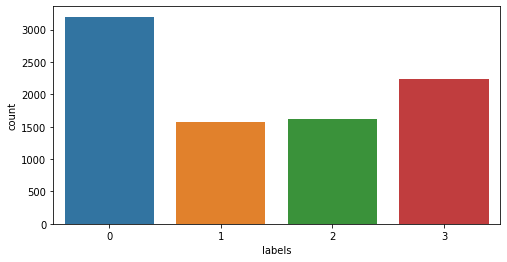

In [ ]:
plt.figure(figsize=(8,4))
map_characters = {0: 'NonDemented', 1: 'ModerateDemented', 2: 'MildDemented', 3: 'VeryMildDemented'}
dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_all
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab).set_title(count_labels(y_all))